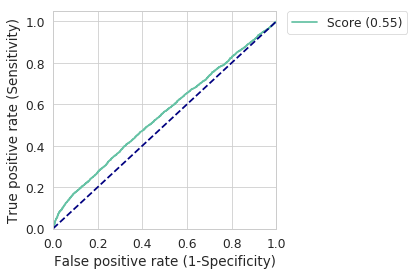

SpearmanrResult(correlation=-0.0681159607391838, pvalue=0.00011573523231670192)

In [4]:
# import pandas as pd
# import sys
# import os
# root_dir = os.path.abspath(os.path.join(os.getcwd(), "../.."))
# os.chdir(root_dir)

# import functions

#Datasets
pET = pd.read_pickle('results/pET_complete.pkl.gz', compression='infer')
ecoli_w3110 = pd.read_pickle('results/ecoli.pkl.gz', compression='infer')
pET['Accession'] = pET['Accession'].apply(lambda x:x.split('_')[0])



wilkinson_pET21 = pd.read_csv('Testing_other_tools/wilkinson/wilkinson_sol_pET21_NESG.txt', sep='\t', header=None)
wilkinson_pET15 = pd.read_csv('Testing_other_tools/wilkinson/wilkinson_sol_pET15_NESG.txt', sep='\t', header=None)
wilkinson_ecoli = pd.read_csv('Testing_other_tools/wilkinson/wilkinson_ecoli_W3110_tags.txt', sep='\t', header=None)

#merge pET
wilkinson_pET = pd.concat([wilkinson_pET15, wilkinson_pET21])


#Rename cols
wilkinson_pET = wilkinson_pET.rename(columns={0:'Accession', 1:'Score'})
wilkinson_ecoli = wilkinson_ecoli.rename(columns={0:'JW', 1:'Score'})

wilkinson_pET.shape, pET.shape, ecoli_w3110.shape, wilkinson_ecoli.shape

#merge results with cleaned dataset
df_pET = pET.merge(wilkinson_pET, on="Accession")
df_ecoli = ecoli_w3110.merge(wilkinson_ecoli, on="JW")


#ROC for pET

df = df_pET[['Score']].copy()

labels = df_pET['Solubility'].values
functions.make_roc(df, labels)

#Correlation for ecoli
from scipy.stats import spearmanr

spearmanr(df_ecoli['Score'], df_ecoli['Solubility(%)'])

In [20]:
df_pET.shape, df_ecoli.shape

((12216, 6), (3198, 6))

In [2]:
cv_10 = pd.read_pickle('results/testing_10_with_tag.pkl')
cv_40 = pd.read_pickle('results/testing_40_with_tag.pkl')
cv_90 = pd.read_pickle('results/testing_90_with_tag.pkl')


In [5]:
#cross validation sets
def compute_auc(df, labels):
    preds = df['Score'].values
    fpr, tpr, _ = functions.roc_curve(labels, preds)
    a = functions.auc(fpr, tpr)
    if a < 0.5:
        a = 1 - a
    return a





In [7]:

all_aucs_test_wilkinson_10 = []
for i, v in enumerate(cv_10):
    v['Accession'] = v.Accession.apply(lambda x:x.split('_')[0])
    v.merge(wilkinson_pET, on="Accession")
    temp = v.merge(wilkinson_pET, on="Accession")[['Score']].copy()
    labels = v.merge(wilkinson_pET, on="Accession")['Solubility'].values
    all_aucs_test_wilkinson_10.append(compute_auc(temp, labels))
all_aucs_test_wilkinson_10

[0.5518240048802806,
 0.5239730479587792,
 0.6021382258383174,
 0.5299106142398806,
 0.5683178401150324,
 0.53041997045434,
 0.5010110029472757,
 0.5773884312904276,
 0.5451334942754021,
 0.5649035306470666]

In [8]:
functions.np.mean(all_aucs_test_wilkinson_10), functions.np.std(all_aucs_test_wilkinson_10)

(0.5495020162646802, 0.02813359964548769)

In [6]:

all_aucs_test_wilkinson_40 = []
for i, v in enumerate(cv_40):
    v['Accession'] = v.Accession.apply(lambda x:x.split('_')[0])
    v.merge(wilkinson_pET, on="Accession")
    temp = v.merge(wilkinson_pET, on="Accession")[['Score']].copy()
    labels = v.merge(wilkinson_pET, on="Accession")['Solubility'].values
    all_aucs_test_wilkinson_40.append(compute_auc(temp, labels))
all_aucs_test_wilkinson_40

[0.5265999369482977,
 0.5093556085918854,
 0.5272760593169419,
 0.5361450241568776,
 0.5760466671667166,
 0.5830896123553708,
 0.5865624659161143,
 0.5567597713970309,
 0.5326756657422567,
 0.5741950923769106]

In [6]:
functions.np.mean(all_aucs_test_wilkinson_40), functions.np.std(all_aucs_test_wilkinson_40)

(0.5508705903968403, 0.026347073566679882)

In [7]:

all_aucs_test_wilkinson_90 = []
for i, v in enumerate(cv_90):
    v['Accession'] = v.Accession.apply(lambda x:x.split('_')[0])
    v.merge(wilkinson_pET, on="Accession")
    temp = v.merge(wilkinson_pET, on="Accession")[['Score']].copy()
    labels = v.merge(wilkinson_pET, on="Accession")['Solubility'].values
    all_aucs_test_wilkinson_90.append(compute_auc(temp, labels))
all_aucs_test_wilkinson_90

[0.5830321031935065,
 0.5460816607465494,
 0.5795801343048652,
 0.5441749795968693,
 0.5257228695417189,
 0.5476832706766918,
 0.5403504471758573,
 0.5682634491361643,
 0.5184417624794687,
 0.5542280285035629]

In [8]:
functions.np.mean(all_aucs_test_wilkinson_90), functions.np.std(all_aucs_test_wilkinson_90)

(0.5507558705355255, 0.02011190530991)